# Feature engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_excel('data/train_data_after_EDA.xlsx')
test_data = pd.read_excel('data/test_with_na.xlsx')


### Transform the income_50k to 1, 0

In [4]:
train_data_copy = train_data
test_data_copy = test_data
train_data_copy['income_50k'] = 1 * (train_data_copy['income_50k'] == ' 50000+.')
test_data_copy['income_50k'] = 1 * (test_data_copy['income_50k'] == ' 50000+.')

In [5]:
train_data_copy

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,weeks_worked,year,class_worker,...,race,sex,union_member,full_or_part_emp,tax_filer_stat,det_hh_summ,mig_same,fam_under_18,citizenship,income_50k
0,73,0,0,0,0,0,0,0,95,Not in universe,...,White,Female,Not in universe,Not in labor force,Nonfiler,Other relative of householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,0
1,58,0,0,0,0,1,0,52,94,Self-employed-not incorporated,...,White,Male,Not in universe,Children or Armed Forces,Head of household,Householder,No,Not in universe,Native- Born in the United States,0
2,18,0,0,0,0,0,0,0,95,Not in universe,...,Asian or Pacific Islander,Female,Not in universe,Not in labor force,Nonfiler,Child 18 or older,Not in universe under 1 year old,Not in universe,Foreign born- Not a citizen of U S,0
3,9,0,0,0,0,0,0,0,94,Not in universe,...,White,Female,Not in universe,Children or Armed Forces,Nonfiler,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,0
4,10,0,0,0,0,0,0,0,94,Not in universe,...,White,Female,Not in universe,Children or Armed Forces,Nonfiler,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,0,0,0,95,Not in universe,...,White,Male,Not in universe,Not in labor force,Joint both 65+,Householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,0
199519,65,0,6418,0,9,1,0,52,94,Self-employed-incorporated,...,White,Male,Not in universe,Children or Armed Forces,Joint one under 65 & one 65+,Householder,Yes,Not in universe,Native- Born in the United States,0
199520,47,0,0,0,157,6,0,52,95,Not in universe,...,White,Male,Not in universe,Children or Armed Forces,Joint both under 65,Householder,Not in universe under 1 year old,Not in universe,Foreign born- U S citizen by naturalization,0
199521,16,0,0,0,0,0,0,0,95,Not in universe,...,White,Female,Not in universe,Not in labor force,Nonfiler,Child under 18 never married,Not in universe under 1 year old,Both parents present,Native- Born in the United States,0


In [6]:
test_data2 = test_data[train_data.columns.tolist()]

### Transform cate_variables to dummies and distribution check

In [7]:
pd.get_dummies(train_data_copy)

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,weeks_worked,year,income_50k,...,fam_under_18_ Both parents present,fam_under_18_ Father only present,fam_under_18_ Mother only present,fam_under_18_ Neither parent present,fam_under_18_ Not in universe,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States
0,73,0,0,0,0,0,0,0,95,0,...,0,0,0,0,1,0,0,0,0,1
1,58,0,0,0,0,1,0,52,94,0,...,0,0,0,0,1,0,0,0,0,1
2,18,0,0,0,0,0,0,0,95,0,...,0,0,0,0,1,1,0,0,0,0
3,9,0,0,0,0,0,0,0,94,0,...,1,0,0,0,0,0,0,0,0,1
4,10,0,0,0,0,0,0,0,94,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,0,0,0,95,0,...,0,0,0,0,1,0,0,0,0,1
199519,65,0,6418,0,9,1,0,52,94,0,...,0,0,0,0,1,0,0,0,0,1
199520,47,0,0,0,157,6,0,52,95,0,...,0,0,0,0,1,0,1,0,0,0
199521,16,0,0,0,0,0,0,0,95,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:
cat_cols = train_data.select_dtypes(include=['object']).columns
num_cols = train_data.select_dtypes(include=['number']).columns
data_cat = train_data[cat_cols]
data_num = train_data[num_cols]

In [9]:
data_cat.nunique()

class_worker         9
education           17
marital_stat         7
major_occ_code      15
race                 5
sex                  2
union_member         3
full_or_part_emp     8
tax_filer_stat       6
det_hh_summ          8
mig_same             3
fam_under_18         5
citizenship          5
dtype: int64

We can drop the first since the degree of freedom is n-1

In [10]:
from sklearn.svm import SVC


In [11]:
# Separate features and target variable in train dataframe
train_features = train_data.drop('income_50k', axis=1)
train_target = train_data['income_50k']

# Separate features and target variable in test dataframe
test_features = test_data2.drop('income_50k', axis=1)
test_target = test_data2['income_50k']


In [12]:
train_target

0         0
1         0
2         0
3         0
4         0
         ..
199518    0
199519    0
199520    0
199521    0
199522    0
Name: income_50k, Length: 199523, dtype: int64

In [13]:
# Define the preprocessing steps for numerical and categorical variables
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, train_features.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', cat_transformer, train_features.select_dtypes(include=['object']).columns)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
# Fit the pipeline to the train data
pipeline.fit(train_features, train_target)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'wage_per_hour', 'capital_gains', 'capital_losses',
       'stock_dividends', 'num_emp', 'own_or_self', 'weeks_worked', 'year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['class_worker', 'education', 'marital_stat', 'major_occ_code', 'race',
       'sex', 'union_member', 'full_or_part_emp', 'tax_filer_stat',
       'det_hh_summ', 'mig_same', 'fam_under_18', 'citizenship'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
# Use the trained pipeline to predict the target variable for the test data
test_predictions = pipeline.predict(test_features)

In [18]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report

# Evaluate the performance of the pipeline using accuracy score
accuracy = accuracy_score(test_target, test_predictions)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.95


In [25]:
test_predictions_prob = pipeline.predict_proba(test_features)

In [41]:
test_predictions_prob[:,1]


array([0.        , 0.09      , 0.        , ..., 0.03      , 0.31041667,
       0.        ])

In [43]:
fpr, tpr, thresholds = roc_curve(test_target, test_predictions_prob[:,1])
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')
cm = confusion_matrix(test_target, test_predictions)
print(f'Confusion matrix:\n{cm}')
report = classification_report(test_target, test_predictions)
print(f'Classification report:\n{report}')
# Plot ROC curve

ROC AUC: 0.9274796874599646
Confusion matrix:
[[92274  1302]
 [ 3486  2700]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     93576
           1       0.67      0.44      0.53      6186

    accuracy                           0.95     99762
   macro avg       0.82      0.71      0.75     99762
weighted avg       0.95      0.95      0.95     99762



In [44]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.90833333e-01, ...,
       4.00000000e-04, 3.03030303e-04, 0.00000000e+00])

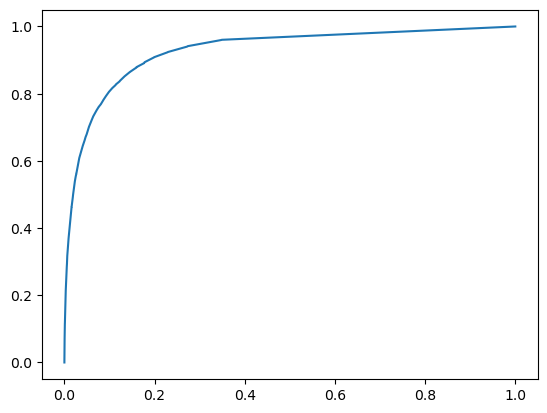

In [45]:
plt.plot(fpr, tpr, label=f'(ROC AUC = {roc_auc:.2f})')
plt.show()

In [16]:
test_target

0        0
1        0
2        0
3        0
4        0
        ..
99757    0
99758    0
99759    0
99760    0
99761    0
Name: income_50k, Length: 99762, dtype: int64

In [73]:
#train_data_copy.to_csv('train_copy.csv',index=False)
#test_data_copy.to_csv('test_copy.csv',index=False)